# applying extreme value theory using climextremes

In [1]:
import requests 
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

import climextremes as cliext

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'climextremes'

In [4]:
!python --version

Python 2.7.16


## extracting time series from netcdf file

In [2]:
ds = xr.open_dataset("./data/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc")
print(ds)

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M mo

In [3]:
# converting precipitation to m/day units

ds["pr"].data = ds["pr"].data * 86.4
ds["pr"].attrs["units"] = 'm/day' 

In [4]:
# setting defined location
# coordinates for berkeley, california

lat = 37.87
lon = 122.27

In [5]:
# getting dataset specifically for defined location

ds_berk = ds.sel(lon=lon, lat=lat, method='nearest')

In [6]:
ds_berk['pr'].values

array([0.00017749, 0.00060158, 0.00168481, ..., 0.00080042, 0.00033764,
       0.00064344], dtype=float32)

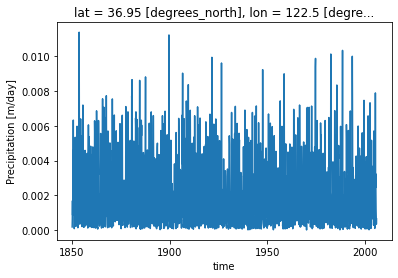

In [7]:
# plotting values for defined location

ds_berk['pr'].plot()

In [8]:
# converting to timeseries

series = ds_berk['pr'].to_pandas()

In [9]:
series.index = series.index.to_datetimeindex()

/var/folders/bz/l7frggbx71n9k19wxh7hvwsm0000gn/T/ipykernel_20816/2564721491.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  series.index = series.index.to_datetimeindex()
